In [1]:
"""
Author: Prathmesh Lagdive
Date: 2026-01-05
Description: Data analysis pipeline for sales CSV data.
This script performs the following:
1. Loads CSV data with columns: Date, Product, Quantity, Price, Customer_ID, Region, Total_Sales
2. Cleans and validates the data
3. Performs analysis: sales trends, top products, regional performance
4. Visualizes data using bar chart and line chart
5. Provides meaningful insights
"""

'\nAuthor: Prathmesh Lagdive\nDate: 2026-01-05\nDescription: Data analysis pipeline for sales CSV data.\nThis script performs the following:\n1. Loads CSV data with columns: Date, Product, Quantity, Price, Customer_ID, Region, Total_Sales\n2. Cleans and validates the data\n3. Performs analysis: sales trends, top products, regional performance\n4. Visualizes data using bar chart and line chart\n5. Provides meaningful insights\n'

In [1]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [10]:

def load_data(file_path):
    """
    Load CSV data with error handling.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File '{file_path}' does not exist.")
    
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return df
    except Exception as e:
        raise ValueError(f"Error loading CSV file: {e}")

def clean_data(df):
    """
    Clean the data:
    - Handle missing values
    - Correct data types
    - Validate numeric columns
    """
    # Drop rows with critical missing values
    df = df.dropna(subset=['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region', 'Total_Sales'])
    
    # Convert types
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce')
    
    # Drop rows with invalid numeric/date conversions
    df = df.dropna(subset=['Date', 'Quantity', 'Price', 'Total_Sales'])
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    print(f"Data cleaned. Remaining rows: {len(df)}")
    return df

def analyze_data(df):
    """
    Perform analysis and return summary statistics and insights.
    """
    # Total sales per product
    sales_per_product = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
    
    # Total sales per region
    sales_per_region = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
    
    # Monthly sales trend
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_sales = df.groupby('Month')['Total_Sales'].sum()
    
    return sales_per_product, sales_per_region, monthly_sales

def visualize_data(sales_per_product, sales_per_region, monthly_sales, output_dir="charts"):
    """
    Create visualizations and save them to disk:
    - Bar chart: Top products by sales
    - Line chart: Monthly sales trend
    - Pie chart: Regional sales distribution
    """
    import os
    sns.set_style("whitegrid")
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Bar chart - Top Products
    plt.figure(figsize=(10,6))
    sns.barplot(x=sales_per_product.index, y=sales_per_product.values, palette="viridis")
    plt.title("Total Sales by Product")
    plt.xlabel("Product")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.tight_layout()
    bar_chart_path = os.path.join(output_dir, "top_products_sales.png")
    plt.savefig(bar_chart_path, dpi=300)
    print(f"Bar chart saved to: {bar_chart_path}")
    
    # Line chart - Monthly Sales Trend
    plt.figure(figsize=(10,6))
    monthly_sales.plot(marker='o', linestyle='-')
    plt.title("Monthly Total Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.tight_layout()
    line_chart_path = os.path.join(output_dir, "monthly_sales_trend.png")
    plt.savefig(line_chart_path, dpi=300)
    print(f"Line chart saved to: {line_chart_path}")
    
    # Pie chart - Regional Sales Distribution 
    plt.figure(figsize=(8,8))
    plt.pie(sales_per_region, labels=sales_per_region.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title("Sales Distribution by Region")
    pie_chart_path = os.path.join(output_dir, "regional_sales_distribution.png")
    plt.savefig(pie_chart_path, dpi=300)
    print(f"Pie chart saved to: {pie_chart_path}")
    plt.plot()



def generate_insights(sales_per_product, sales_per_region, monthly_sales):
    """
    Generate meaningful insights from the data analysis
    """
    insights = []
    
    # Top performing product
    top_product = sales_per_product.idxmax()
    insights.append(f"The top-selling product is '{top_product}' with total sales of {sales_per_product.max():,.2f}.")
    
    # Lowest performing product
    low_product = sales_per_product.idxmin()
    insights.append(f"The lowest-selling product is '{low_product}' with total sales of {sales_per_product.min():,.2f}.")
    
    # Best performing region
    top_region = sales_per_region.idxmax()
    insights.append(f"The region with the highest sales is '{top_region}' contributing {sales_per_region[top_region]:,.2f} in sales.")
    
    # Monthly sales trend
    max_month = monthly_sales.idxmax()
    min_month = monthly_sales.idxmin()
    insights.append(f"The month with the highest sales is {max_month} ({monthly_sales.max():,.2f}), and the lowest is {min_month} ({monthly_sales.min():,.2f}).")
    
    return insights


Data loaded successfully.
Data cleaned. Remaining rows: 100
Bar chart saved to: ../visualizations\top_products_sales.png


C:\Users\prathmesh\AppData\Local\Temp\ipykernel_58836\1535437811.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_product.index, y=sales_per_product.values, palette="viridis")


Line chart saved to: ../visualizations\monthly_sales_trend.png
Pie chart saved to: ../visualizations\regional_sales_distribution.png


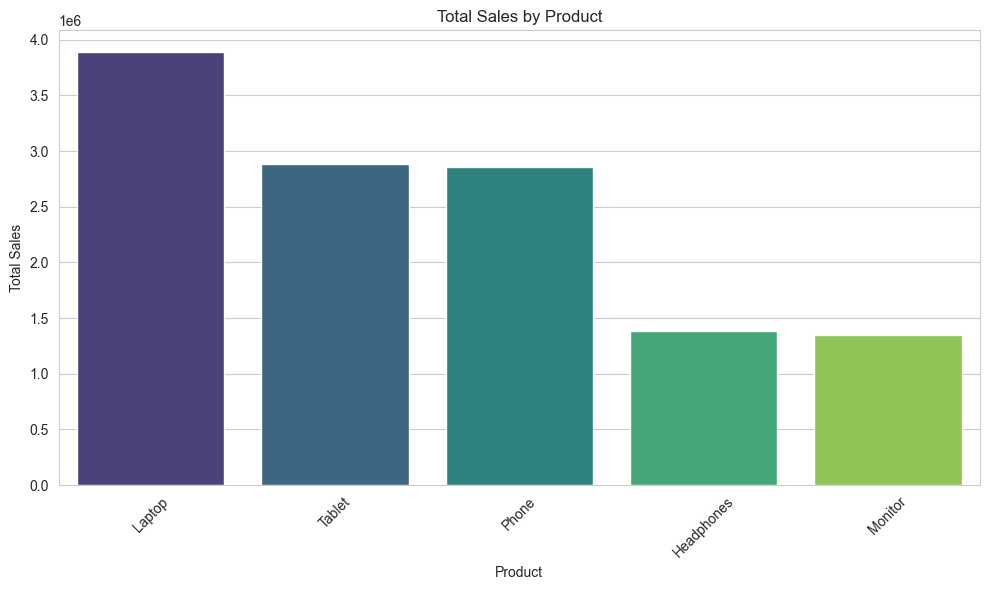

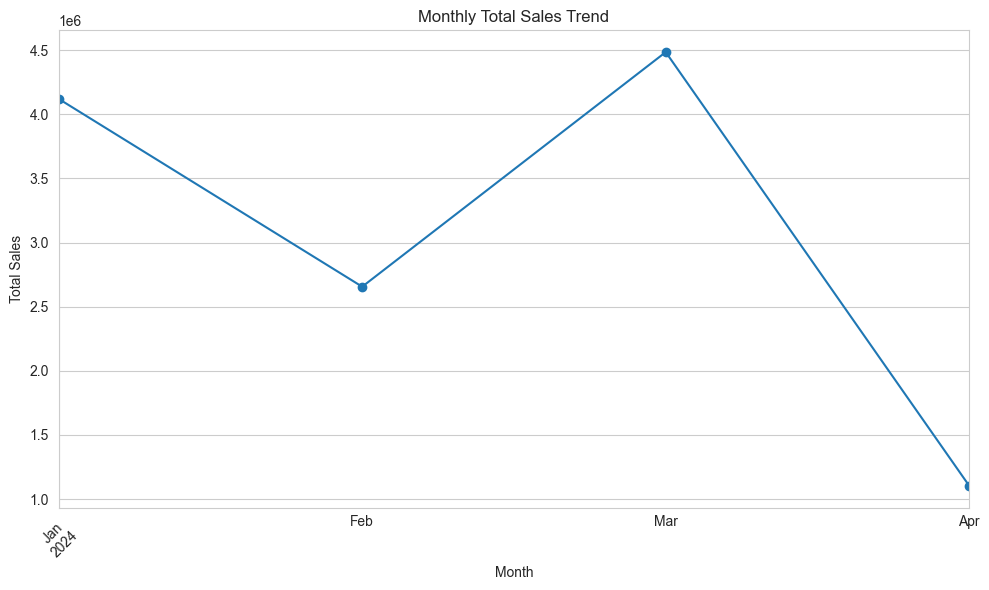

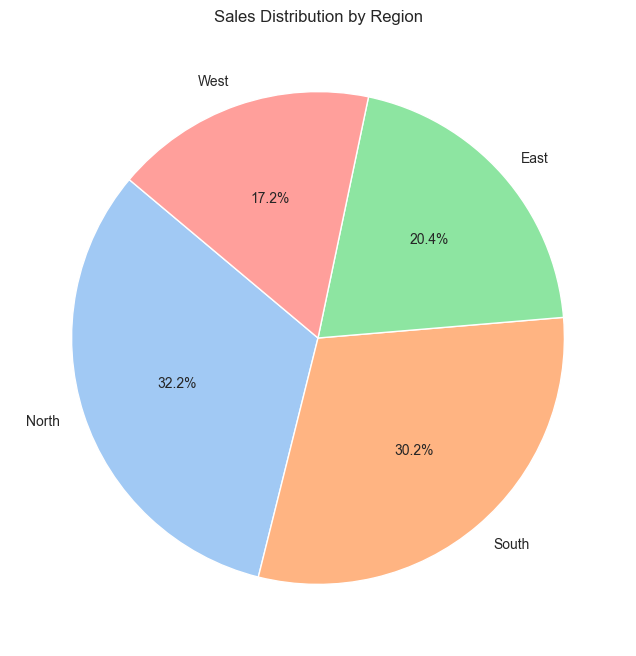

In [13]:

# Main Execution

try:
    # Load data
    file_path = "../data/sales_data.csv"  # Replace with your CSV file path
except Exception as e:
    print(f"An error occurred: {e}")

df = load_data(file_path)

# Clean data
df = clean_data(df)

# Analyze data
sales_per_product, sales_per_region, monthly_sales = analyze_data(df)

# Visualize data
visualize_data(sales_per_product, sales_per_region, monthly_sales, output_dir='../visualizations')


In [5]:
# Generate insights
insights = generate_insights(sales_per_product, sales_per_region, monthly_sales)
print("\n--- Data Analysis Insights ---")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


--- Data Analysis Insights ---
1. The top-selling product is 'Laptop' with total sales of 3,889,210.00.
2. The lowest-selling product is 'Monitor' with total sales of 1,348,071.00.
3. The region with the highest sales is 'North' contributing 3,983,635.00 in sales.
4. The month with the highest sales is 2024-03 (4,485,006.00), and the lowest is 2024-04 (1,103,468.00).
